In [2]:
# Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from IPython.display import display
from scipy.stats import ttest_ind


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file path
filepath = "../Resources/user_behavior_dataset.csv"

# Read in the data.
ub = pd.read_csv(filepath)
ub.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
ub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [192]:
# Dropping "User Behavior Class"

ub2 = ub.drop("User Behavior Class", axis=1)

# Save the result
ub2.info()
ub2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [150]:
ub2.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


In [335]:
ub2.shape

(700, 10)

In [336]:
ub2.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
dtype: int64

In [337]:
device_model_counts = ub2["Device Model"].value_counts()
device_model_counts

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

<Axes: xlabel='App Usage Time (min/day)', ylabel='Battery Drain (mAh/day)'>

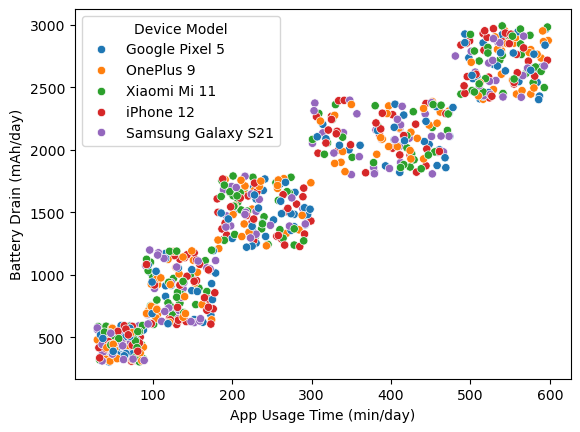

In [338]:
sns.scatterplot(data=ub2, x="App Usage Time (min/day)", y="Battery Drain (mAh/day)", hue="Device Model")

<Axes: xlabel='Number of Apps Installed', ylabel='Battery Drain (mAh/day)'>

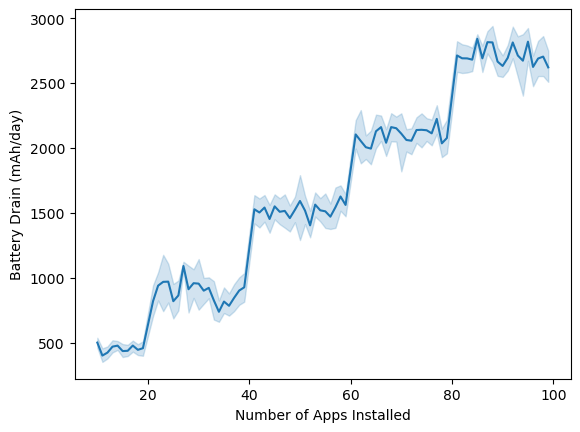

In [339]:
sns.lineplot(data=ub2, x="Number of Apps Installed", y="Battery Drain (mAh/day)")

In [340]:
battery_app_usage = ub2[["App Usage Time (min/day)", "Battery Drain (mAh/day)"]]
battery_app_usage

,App Usage Time (min/day),Battery Drain (mAh/day)
0,393,1872
1,268,1331
2,154,761
3,239,1676
4,187,1367
...,...,...
695,92,1082
696,316,1965
697,99,942
698,62,431


In [341]:
battery_app_usage.head()

,App Usage Time (min/day),Battery Drain (mAh/day)
0,393,1872
1,268,1331
2,154,761
3,239,1676
4,187,1367


In [342]:
battery_app_installed = ub2[["Number of Apps Installed", "Battery Drain (mAh/day)"]]
battery_app_installed

,Number of Apps Installed,Battery Drain (mAh/day)
0,67,1872
1,42,1331
2,32,761
3,56,1676
4,58,1367
...,...,...
695,26,1082
696,68,1965
697,22,942
698,13,431


In [343]:
battery_app_installed.head()

,Number of Apps Installed,Battery Drain (mAh/day)
0,67,1872
1,42,1331
2,32,761
3,56,1676
4,58,1367


(252.0, 3043.0)

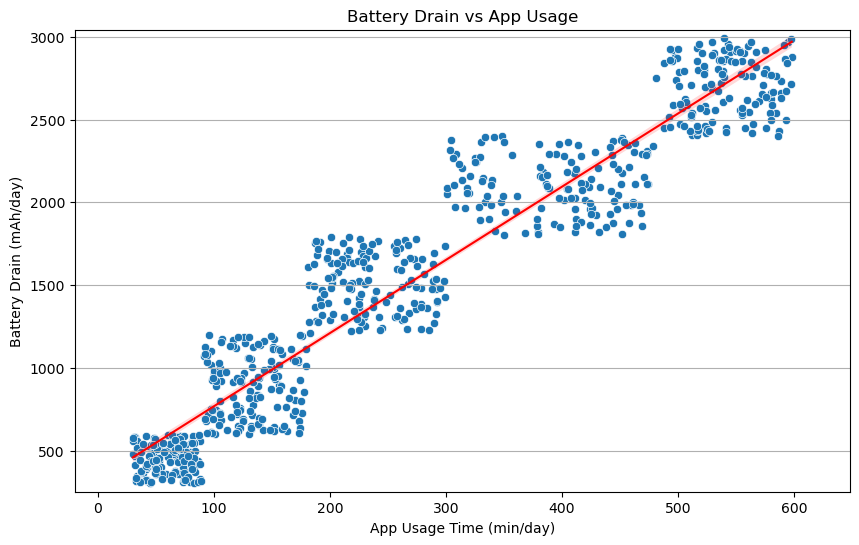

In [344]:
# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=ub2)

# Regression line
sns.regplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=ub2, scatter=False, color='red', line_kws={'linewidth': 1.5})

# titles and labels
plt.title('Battery Drain vs App Usage')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.grid(True, axis='y')

plt.xlim(min(ub2['App Usage Time (min/day)'] - 50),  max(ub2['App Usage Time (min/day)']) + 50)
plt.ylim(min(ub2['Battery Drain (mAh/day)'] - 50), max(ub2['Battery Drain (mAh/day)']) + 50)



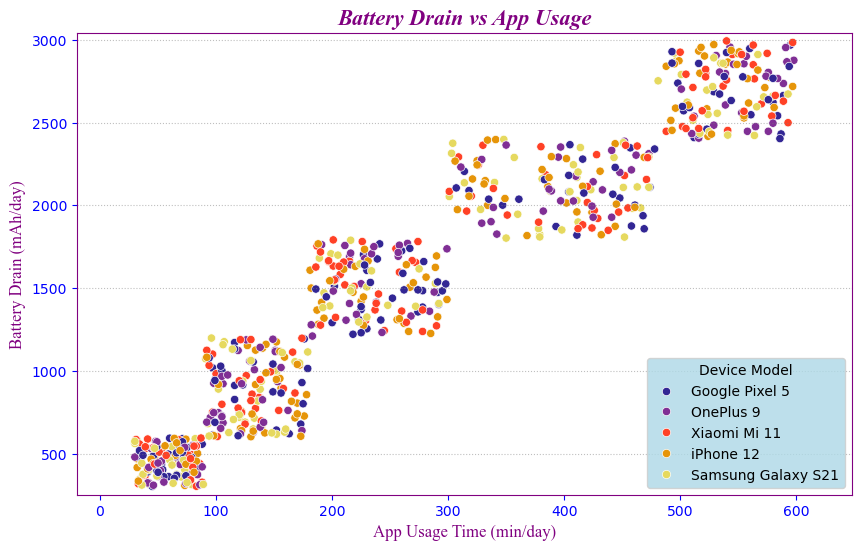

In [345]:
# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=ub2, palette='CMRmap', hue="Device Model")


# grid lines customization
plt.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5)  

# titles and labels
plt.title('Battery Drain vs App Usage',color="purple", fontsize=16, fontweight='bold', family='Times New Roman', style="italic")
plt.xlabel('App Usage Time (min/day)', color="purple", fontsize=12, family="Times New Roman")
plt.ylabel('Battery Drain (mAh/day)', color="purple", fontsize=12, family="Times New Roman")
plt.grid(True, axis='y')

# axis colors 
plt.tick_params(axis='x', labelcolor='blue', colors='blue')  
plt.tick_params(axis='y', labelcolor='blue', colors='blue')    


# axis border colors
plt.gca().spines['top'].set_color('purple')
plt.gca().spines['right'].set_color('purple')
plt.gca().spines['bottom'].set_color('purple')
plt.gca().spines['left'].set_color('purple')

plt.xlim(min(ub2['App Usage Time (min/day)'] - 50),  max(ub2['App Usage Time (min/day)']) + 50)
plt.ylim(min(ub2['Battery Drain (mAh/day)'] - 50), max(ub2['Battery Drain (mAh/day)']) + 50)

# moving legend hue
plt.legend(title="Device Model", loc='lower right', frameon=True, facecolor='lightblue') 



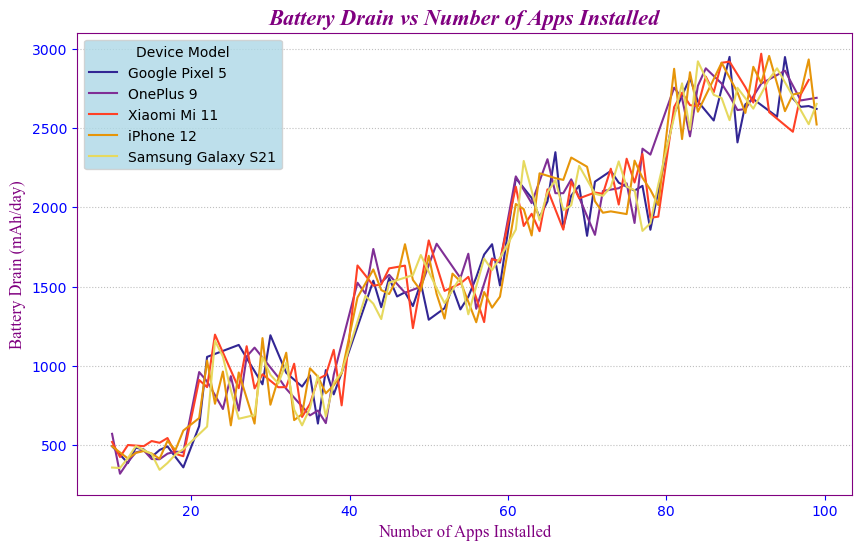

In [346]:
# linear chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=ub2, palette='CMRmap', hue="Device Model", errorbar=None, linewidth=1.5)


# grid lines customization
plt.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5)  

# color of axis
plt.tick_params(axis='x', labelcolor='blue', colors='blue')  
plt.tick_params(axis='y', labelcolor='blue', colors='blue')        


# color of axis border
plt.gca().spines['top'].set_color('purple')
plt.gca().spines['right'].set_color('purple')
plt.gca().spines['bottom'].set_color('purple')
plt.gca().spines['left'].set_color('purple')

# titles and labels
plt.title('Battery Drain vs Number of Apps Installed',color="purple", fontsize=16, fontweight='bold', family='Times New Roman', style="italic")
plt.xlabel('Number of Apps Installed', color="purple", fontsize=12, family="Times New Roman")
plt.ylabel('Battery Drain (mAh/day)', color="purple", fontsize=12, family="Times New Roman")
plt.grid(True, axis='y')

# moving legend hue
plt.legend(title="Device Model", loc='upper left', frameon=True, facecolor='lightblue')  

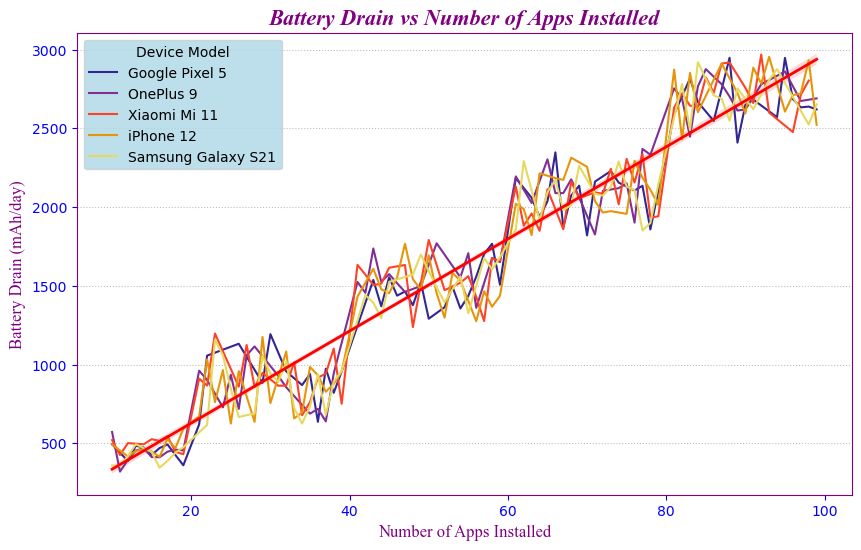

In [347]:
# linear chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=ub2, palette='CMRmap', hue="Device Model", errorbar=None, linewidth=1.5)


# grid line customization
plt.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5)


# Regression line
sns.regplot(x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=ub2, scatter=False, color='red', line_kws={'linewidth': 2})

# axis colors
plt.tick_params(axis='x', labelcolor='blue', colors='blue')  
plt.tick_params(axis='y', labelcolor='blue', colors='blue')        

# axis border colors
plt.gca().spines['top'].set_color('purple')
plt.gca().spines['right'].set_color('purple')
plt.gca().spines['bottom'].set_color('purple')
plt.gca().spines['left'].set_color('purple')

# titles and labels
plt.title('Battery Drain vs Number of Apps Installed',color="purple", fontsize=16, fontweight='bold', family='Times New Roman', style="italic")
plt.xlabel('Number of Apps Installed', color="purple", fontsize=12, family="Times New Roman")
plt.ylabel('Battery Drain (mAh/day)', color="purple", fontsize=12, family="Times New Roman")
plt.grid(True, axis='y')

# moving legend hue 
plt.legend(title="Device Model", loc='upper left', frameon=True, facecolor='lightblue')  

Text(0.75, 0.1, 'y = 29.242x + 43.109')

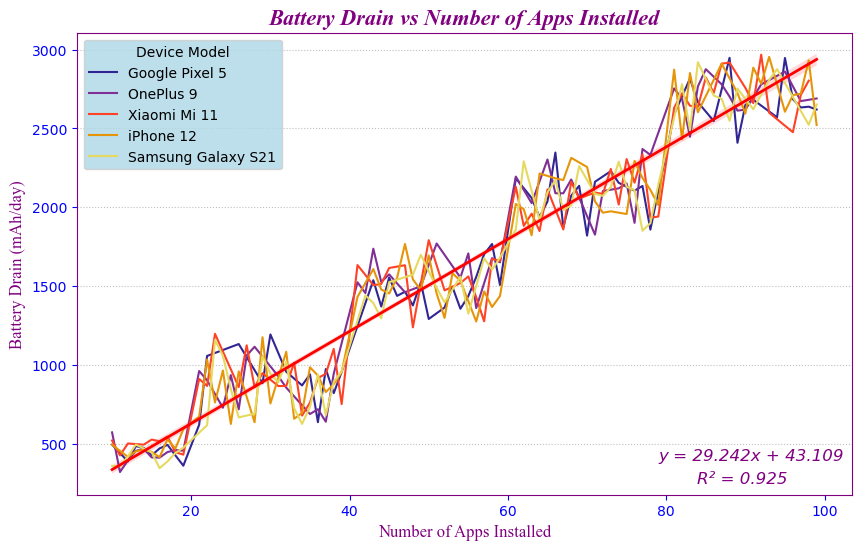

In [348]:
# linear chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=ub2, palette='CMRmap', hue="Device Model", errorbar=None, linewidth=1.5)


# grid line customization
plt.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5)  # Dotted and lighter grid


# Regression line
sns.regplot(x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=ub2, scatter=False, color='red', line_kws={'linewidth': 2})

# axis color tick labels
plt.tick_params(axis='x', labelcolor='blue', colors='blue') 
plt.tick_params(axis='y', labelcolor='blue', colors='blue')        

# axis border colors
plt.gca().spines['top'].set_color('purple')
plt.gca().spines['right'].set_color('purple')
plt.gca().spines['bottom'].set_color('purple')
plt.gca().spines['left'].set_color('purple')

# Add titles and labels
plt.title('Battery Drain vs Number of Apps Installed',color="purple", fontsize=16, fontweight='bold', family='Times New Roman', style="italic")
plt.xlabel('Number of Apps Installed', color="purple", fontsize=12, family="Times New Roman")
plt.ylabel('Battery Drain (mAh/day)', color="purple", fontsize=12, family="Times New Roman")
plt.grid(True, axis='y')

# moving legend hue
plt.legend(title="Device Model", loc='upper left', frameon=True, facecolor='lightblue')  # Moves the legend outside the plot

# Extracting the independent and dependent variables
x = ub2[['Number of Apps Installed']]  
y = ub2['Battery Drain (mAh/day)']    

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Calculate R-squared
r_squared = model.score(x, y)

# Display R-squared value on the plot
plt.text(0.80, 0.05, f'R² = {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, color='purple', ha='left', va='top', fontstyle='italic')

# Get the slope and intercept
slope = model.coef_[0]  
intercept = model.intercept_  

# Display the regression equation 
plt.text(0.75, 0.1, f'y = {slope:.3f}x + {intercept:.3f}', transform=plt.gca().transAxes, fontsize=12, color='purple', ha='left', va='top', fontstyle='italic')

<function matplotlib.pyplot.show(close=None, block=None)>

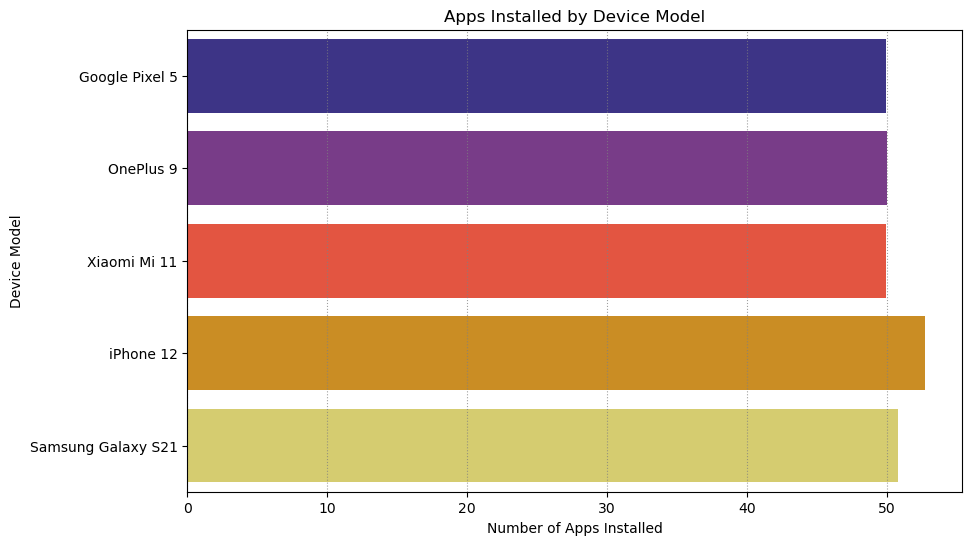

In [349]:
plt.figure(figsize=(10, 6))

plt.grid(True, axis='x', linestyle=':', color='gray', alpha=0.75)

sns.barplot(y='Device Model', x="Number of Apps Installed", data=ub2, palette='CMRmap', errorbar=None, hue='Device Model', legend=False)
plt.title('Apps Installed by Device Model')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Device Model')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

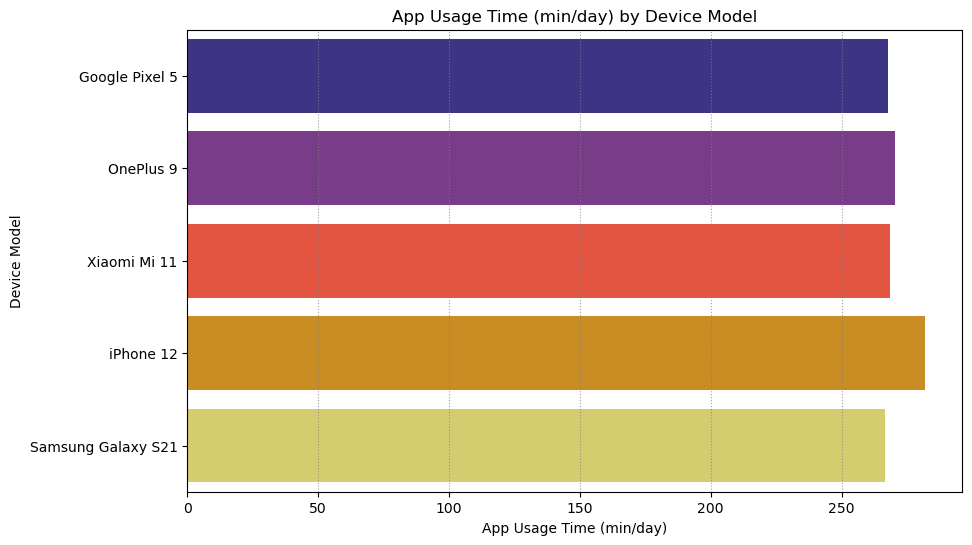

In [350]:
plt.figure(figsize=(10, 6))

plt.grid(True, axis='x', linestyle=':', color='gray', alpha=0.75)

sns.barplot(y='Device Model', x="App Usage Time (min/day)", data=ub2, palette='CMRmap', errorbar=None, hue='Device Model', legend=False)
plt.title('App Usage Time (min/day) by Device Model')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Device Model')
plt.show

In [351]:
deviceapp = ub2[["Number of Apps Installed", "Device Model"]]
deviceapp = deviceapp.sort_values(by = "Number of Apps Installed", ascending=True)
deviceapp.info()
deviceapp

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 292 to 378
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Number of Apps Installed  700 non-null    int64 
 1   Device Model              700 non-null    object
dtypes: int64(1), object(1)
memory usage: 16.4+ KB


,Number of Apps Installed,Device Model
292,10,Google Pixel 5
527,10,iPhone 12
399,10,OnePlus 9
154,10,Xiaomi Mi 11
56,10,OnePlus 9
...,...,...
122,99,Google Pixel 5
434,99,iPhone 12
80,99,OnePlus 9
504,99,Google Pixel 5


In [352]:
ub2['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [353]:
# group by device model and calculating mean
grouped = ub2.groupby('Device Model').agg({
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Number of Apps Installed': 'mean',
    'Data Usage (MB/day)': 'mean'
}).reset_index()


# Sorting by app usage time
grouped_sorted = grouped.sort_values(by='App Usage Time (min/day)', ascending=False)

# adding rank column
grouped_sorted['Rank'] = range(1, len(grouped_sorted) + 1)

# leaderboards by sorting groups
leaderboard = grouped_sorted[['Rank', 'Device Model', 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
                              'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']]

# Show the leaderboard
print(leaderboard)

   Rank        Device Model  App Usage Time (min/day)  Screen On Time (hours/day)  Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)
4     1           iPhone 12                282.020548                    5.430822              1589.513699                 52.726027           965.506849
1     2           OnePlus 9                270.383459                    5.241353              1523.849624                 49.969925           911.120301
3     3        Xiaomi Mi 11                268.452055                    5.293151              1528.876712                 49.924658           940.164384
0     4      Google Pixel 5                267.788732                    5.076056              1475.676056                 49.908451           897.704225
2     5  Samsung Galaxy S21                266.421053                    5.318045              1504.571429                 50.804511           931.872180


In [354]:
grouped_data = ub2.groupby('Device Model')['Number of Apps Installed'].sum()
sorted_data = grouped_data.sort_values(ascending=False)
sorted_data

Device Model
iPhone 12             7698
Xiaomi Mi 11          7289
Google Pixel 5        7087
Samsung Galaxy S21    6757
OnePlus 9             6646
Name: Number of Apps Installed, dtype: int64

In [355]:
ub2.groupby('Device Model')['App Usage Time (min/day)'].mean().round()

Device Model
Google Pixel 5        268.0
OnePlus 9             270.0
Samsung Galaxy S21    266.0
Xiaomi Mi 11          268.0
iPhone 12             282.0
Name: App Usage Time (min/day), dtype: float64

In [356]:
result = ub2.groupby('Device Model')['Number of Apps Installed'].sum().sort_values(ascending=False)
result

Device Model
iPhone 12             7698
Xiaomi Mi 11          7289
Google Pixel 5        7087
Samsung Galaxy S21    6757
OnePlus 9             6646
Name: Number of Apps Installed, dtype: int64

In [357]:
result = ub2.groupby('Device Model')['App Usage Time (min/day)'].mean().round().sort_values(ascending=False)
result

Device Model
iPhone 12             282.0
OnePlus 9             270.0
Google Pixel 5        268.0
Xiaomi Mi 11          268.0
Samsung Galaxy S21    266.0
Name: App Usage Time (min/day), dtype: float64

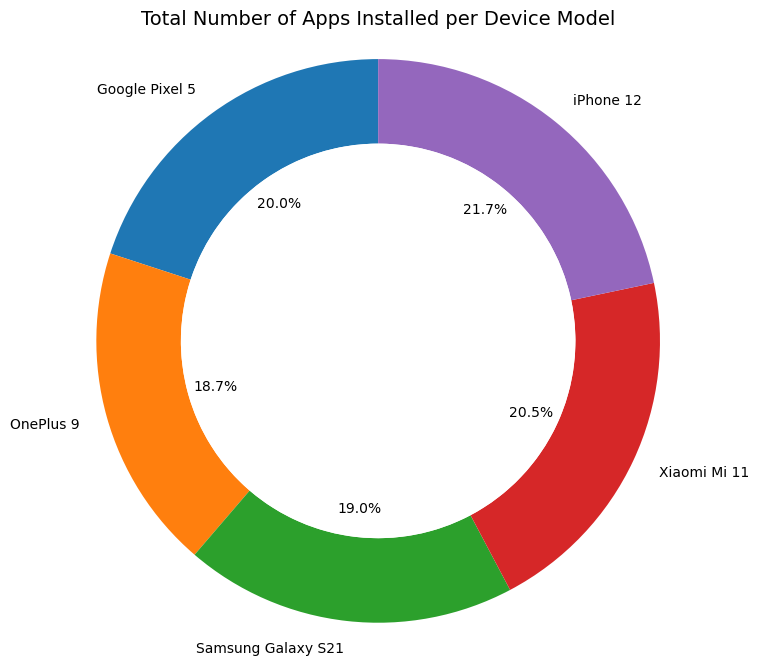

In [358]:
# Group by 'Device Model' and sum 'Number of Apps Installed'
app_installed = ub2.groupby('Device Model')['Number of Apps Installed'].sum()

# donut chart
plt.figure(figsize=(8, 8))
plt.pie(app_installed, labels=app_installed.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})

centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

# title
plt.title('Total Number of Apps Installed per Device Model', fontsize=14)
plt.axis('equal') 
plt.show()

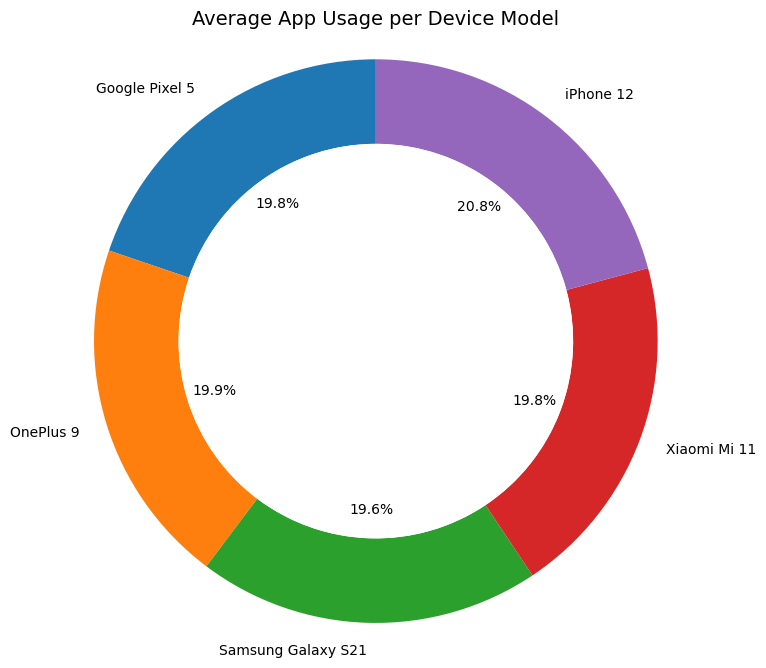

In [359]:
# Group by 'Device Model' and sum 'Number of Apps Installed'
app_usage = ub2.groupby('Device Model')['App Usage Time (min/day)'].mean().round()

# donut chart
plt.figure(figsize=(8, 8))
plt.pie(app_usage, labels=app_usage.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})

centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.title('Average App Usage per Device Model', fontsize=14)
plt.axis('equal')  
plt.show()

In [360]:
ub3 = pd.read_csv("user_behavior_data.csv") 

# grouping by device model and calculating means
numeric_columns = ub3.select_dtypes(include=["number"]).columns 
average_leaderboard = ub3.groupby("Device Model")[numeric_columns].mean()

# sorting by app usage time
average_leaderboard = average_leaderboard.sort_values("App Usage Time (min/day)", ascending=True)

# Reset index to make 'Device Model' a regular column
average_leaderboard.reset_index(inplace=True)

# adding rank column
average_leaderboard["Rank"] = average_leaderboard.index + 1

# saving leaderboard to new csv file
average_leaderboard.to_csv("average_leaderboard.csv", index=True)

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", 1000)       
pd.set_option("display.max_colwidth", None) 

# Dropping USER ID column
average_leaderboard = average_leaderboard.drop(columns=["User ID"])

# moving rank column before device model
columns_order = ['Rank'] + [col for col in average_leaderboard.columns if col != 'Rank']
average_leaderboard = average_leaderboard.reindex(columns=columns_order)

# rounding to nearest interger, 2 decimal or 1 decimal
average_leaderboard["Age"] = average_leaderboard["Age"].round()
average_leaderboard["Number of Apps Installed"] = average_leaderboard["Number of Apps Installed"].round()
average_leaderboard["Battery Drain (mAh/day)"] = average_leaderboard["Battery Drain (mAh/day)"].round(2)
average_leaderboard["Data Usage (MB/day)"] = average_leaderboard["Data Usage (MB/day)"].round(2)
average_leaderboard["Screen On Time (hours/day)"] = average_leaderboard["Screen On Time (hours/day)"].round(1)
average_leaderboard["App Usage Time (min/day)"] = average_leaderboard["App Usage Time (min/day)"].round(1)

display(average_leaderboard)



,Rank,Device Model,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
0,1,Samsung Galaxy S21,266.4,5.3,1504.57,51.0,931.87,39.0
1,2,Google Pixel 5,267.8,5.1,1475.68,50.0,897.70,38.0
2,3,Xiaomi Mi 11,268.5,5.3,1528.88,50.0,940.16,38.0
3,4,OnePlus 9,270.4,5.2,1523.85,50.0,911.12,39.0
4,5,iPhone 12,282.0,5.4,1589.51,53.0,965.51,39.0


In [361]:
from scipy.stats import ttest_ind

#t-test
data = {
    "Device Model": ["Samsung Galaxy S21", "Google Pixel 5", "Xiaomi Mi 11", "OnePlus 9", "iPhone 12"],
    "App Usage Time (min/day)": [266.4, 267.8, 268.5, 270.4, 282.0],
}

average_leaderboard = pd.DataFrame(data)

group1 = ub3[ub3["Device Model"] == "Samsung Galaxy S21"]["App Usage Time (min/day)"]
group2 = ub3[ub3["Device Model"] == "iPhone 12"]["App Usage Time (min/day)"]

t_stat, p_value = ttest_ind(group1, group2)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")



T-Statistic: -0.7552284920027416
P-Value: 0.45075356442672654
Fail to reject the null hypothesis: No significant difference.


In [362]:
from scipy.stats import f_oneway

#ANOVA one way
data = {
    "Device Model": ["Samsung Galaxy S21", "Google Pixel 5", "Xiaomi Mi 11", "OnePlus 9", "iPhone 12",
                     "Samsung Galaxy S21", "Google Pixel 5", "Xiaomi Mi 11", "OnePlus 9", "iPhone 12"],
    "App Usage Time (min/day)": [266.4, 267.8, 268.5, 270.4, 282.0, 265.0, 272.0, 265.5, 268.0, 284.0],
}

ub3 = pd.DataFrame(data)

# Group the data by 'Device Model'
grouped_data = [ub3[ub3["Device Model"] == device]["App Usage Time (min/day)"] for device in ub3["Device Model"].unique()]

f_stat, p_value = f_oneway(*grouped_data)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means.")

F-Statistic: 25.095411887382923
P-Value: 0.001658085732801218
Reject the null hypothesis: There is a significant difference between the means.
